# Project : Isotherms and Henry's coefficients of N2 and CO2 with different materials

## Question 1 - Properties of materials

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyiast as pyiast
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [48]:
#Pore analysis for Mg-MOF-74
material_data = pd.read_csv("Mg-MOF-74.csv")
print("Properties of Mg-MOF-74:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of Mg-MOF-74:
Accessible surface area: 222.828 A^2
Density: 0.886275 g/cm^3
Probe-occupiable accessible volume: 837.198 A^3
Material porosity: 0.61368


In [49]:
#pore analysis is NOTT-300
material_data = pd.read_csv("NOTT-300.csv")
print("Properties of NOTT-300:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of NOTT-300:
Accessible surface area: 453.452 A^2
Density: 1.03926 g/cm^3
Probe-occupiable accessible volume: 1297.11 A^3
Material porosity: 0.48999


In [50]:
#pore analysis of UTSA-20
material_data = pd.read_csv("UTSA-20.csv")
print("Properties of UTSA-20:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-20:
Accessible surface area: 1307.51 A^2
Density: 0.882399 g/cm^3
Probe-occupiable accessible volume: 3575.36 A^3
Material porosity: 0.62907


In [51]:
#pore analysis of UTSA-80
material_data = pd.read_csv("UTSA-80.csv")
print("Properties of UTSA-80:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of UTSA-80:
Accessible surface area: 3114.62 A^2
Density: 0.678215 g/cm^3
Probe-occupiable accessible volume: 9619.78 A^3
Material porosity: 0.66798


In [52]:
#pore analysis of ZIF-8
material_data = pd.read_csv("ZIF-8.csv")
print("Properties of ZIF-8:")

surface_area = material_data[material_data['Key'] == "ASA_A^2"].iloc[0, 1]
print(f"Accessible surface area: {surface_area} A^2")

material_density = material_data[material_data['Key'] == "Density"].iloc[0, 1]
print(f"Density: {material_density} g/cm^3")

pore_volume = material_data[material_data['Key'] == "POAV_A^3"].iloc[0, 1]
print(f"Probe-occupiable accessible volume: {pore_volume} A^3")

porosity_fraction = material_data[material_data['Key'] == "POAV_Volume_fraction"].iloc[0, 1]
print(f"Material porosity: {porosity_fraction}")

Properties of ZIF-8:
Accessible surface area: 787.421 A^2
Density: 0.909567 g/cm^3
Probe-occupiable accessible volume: 2488.25 A^3
Material porosity: 0.49906


## Question 2 — Henry’s Coefficients

We load the Henry’s constants $K_H$ for CO₂ and N₂ at 25 °C from the CSV files to compare their gas affinities.
A higher $K_H$ indicates stronger CO₂ adsorption; we then rank the materials by decreasing $K_H(\mathrm{CO₂})$.

🔎 CO₂ Henry files: 5 | N₂ Henry files: 5


,MOF,KH_CO2 (mmol·g⁻¹·bar⁻¹),KH_N2 (mmol·g⁻¹·bar⁻¹),KH_ratio CO2/N2
0,NOTT,18.5,1.05,17.53
1,Mg,8.66,0.334,25.96
2,UTSA-20,4.1,0.438,9.37
3,UTSA-80,1.7,0.333,5.11
4,ZIF-8,0.883,nan,nan



Used:
 - Mg — CO2:Mg-H-CO2.csv | N2:Mg-H-N2.csv
 - NOTT — CO2:NOTT-H-CO2.csv | N2:NOTT-H-N2.csv
 - UTSA-20 — CO2:UTSA-20-H-CO2.csv | N2:UTSA-20-H-N2.csv
 - UTSA-80 — CO2:UTSA-80-H-CO2.csv | N2:UTSA-80-H-N2.csv
 - ZIF-8 — CO2:ZIF-8-H-CO2.csv | N2:ZIF-8-H-N2.csv


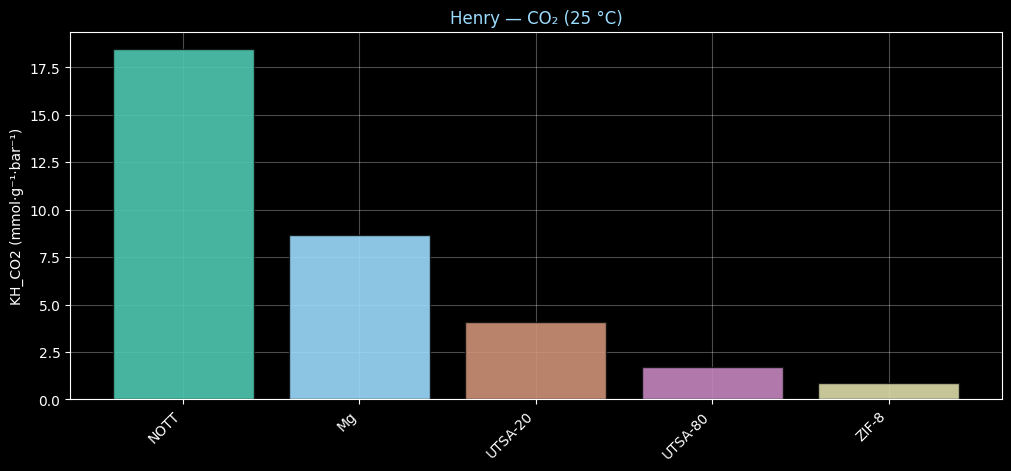

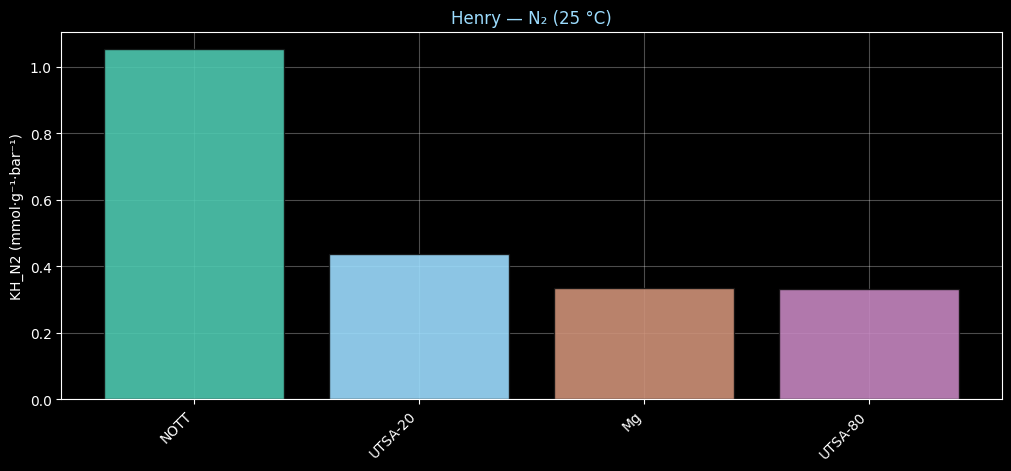

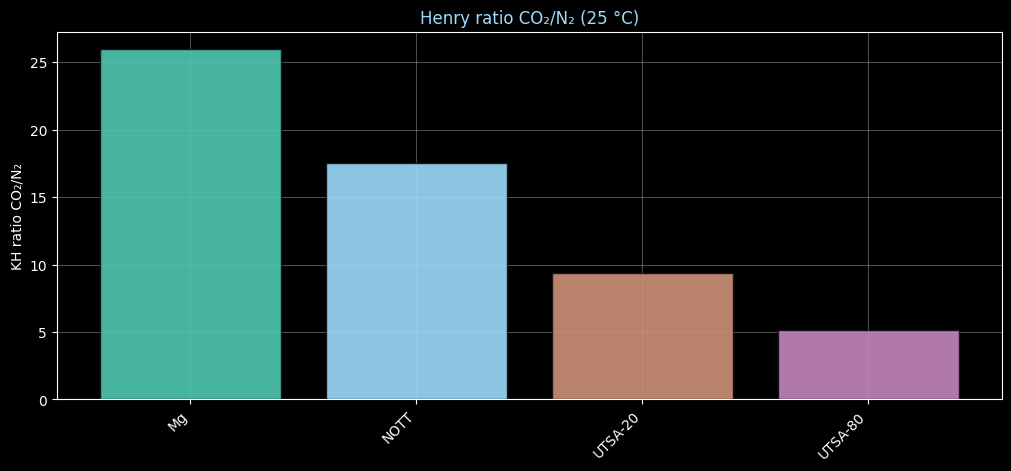

In [53]:
# ================================================
# Q2 — Henry coefficients (CO₂ & N₂): extraction, conversion, ranking
# ================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, ast
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# ---------- Recherche fichiers ----------
base = Path("CSV") if Path("CSV").exists() else Path(".")
co2_files = {p.stem.replace("-H-CO2",""): p for p in base.rglob("*-H-CO2.csv")}
n2_files  = {p.stem.replace("-H-N2",""):  p for p in base.rglob("*-H-N2.csv")}
materials = sorted(set(co2_files) | set(n2_files))

print(f"🔎 CO₂ Henry files: {len(co2_files)} | N₂ Henry files: {len(n2_files)}")

if not materials:
    raise SystemExit("Aucun fichier '*-H-CO2.csv' / '*-H-N2.csv' trouvé. Vérifie le dossier.")

# ---------- Extracteur de KH (robuste) ----------
def _to_float(x):
    """Convertit proprement strings/nombres (retourne np.nan si impossible)."""
    try:
        return float(x)
    except Exception:
        try:
            # Essaie d'évaluer un éventuel JSON/texte numérique
            return float(ast.literal_eval(str(x)))
        except Exception:
            return np.nan

def read_KH_mmol_g_bar(path: Path):
    """
    Lit 'henry_coefficient_average' (mol/kg/Pa) et convertit en mmol/g/bar.
    Conversion: (mol/kg/Pa) × 1e5 (Pa/bar) = mol/kg/bar = mmol/g/bar.
    Retourne np.nan si non trouvé.
    """
    try:
        df = pd.read_csv(path)
        # normaliser noms de colonnes
        cols = {c.lower(): c for c in df.columns}
        key_col = cols.get("key", None)
        val_col = cols.get("value", None)

        kh_molkgPa = np.nan

        if key_col and val_col:
            # format Key/Value (Zeo++ export)
            row = df.loc[
                df[key_col].astype(str).str.contains("henry_coefficient_average", case=False, na=False),
                val_col
            ]
            if not row.empty:
                kh_molkgPa = _to_float(row.iloc[0])
        else:
            # autre format éventuel : chercher une colonne qui contient le nom directement
            for c in df.columns:
                if "henry" in c.lower():
                    kh_molkgPa = _to_float(df[c].iloc[0])
                    break

        if not np.isfinite(kh_molkgPa):
            return np.nan

        # Conversion en mmol/g/bar
        return kh_molkgPa * 1e5

    except Exception:
        return np.nan

# ---------- Agrégation ----------
rows, used, skipped = [], [], []
for mat in materials:
    pco2 = co2_files.get(mat)
    pn2  = n2_files.get(mat)

    kh_co2 = read_KH_mmol_g_bar(pco2) if pco2 else np.nan
    kh_n2  = read_KH_mmol_g_bar(pn2)  if pn2  else np.nan
    ratio  = kh_co2/kh_n2 if (np.isfinite(kh_co2) and np.isfinite(kh_n2) and kh_n2>0) else np.nan

    rows.append({
        "MOF": mat,
        "KH_CO2 (mmol·g⁻¹·bar⁻¹)": kh_co2,
        "KH_N2 (mmol·g⁻¹·bar⁻¹)":  kh_n2,
        "KH_ratio CO2/N2": ratio
    })

    tags=[]
    if pco2: tags.append(f"CO2:{pco2.name}")
    if pn2:  tags.append(f"N2:{pn2.name}")
    (used if tags else skipped).append(mat + (" — " + " | ".join(tags) if tags else ""))

df = pd.DataFrame(rows)

# ---------- Tableau stylé ----------
if df.empty:
    display(pd.DataFrame({"Info":["Aucune donnée de Henry extraite."]}))
else:
    df_rank = df.sort_values("KH_CO2 (mmol·g⁻¹·bar⁻¹)", ascending=False).reset_index(drop=True)
    styled = (
        df_rank.style
        .format({
            "KH_CO2 (mmol·g⁻¹·bar⁻¹)":"{:.3g}",
            "KH_N2 (mmol·g⁻¹·bar⁻¹)":"{:.3g}",
            "KH_ratio CO2/N2":"{:.2f}"
        })
        .set_properties(**{"text-align":"center"})
        .set_caption("Henry coefficients at 25 °C — Units: mmol·g⁻¹·bar⁻¹")
        .set_table_styles([
            {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),("color","#9cdcfe"),("font-size","14px")]},
            {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),
                                      ("text-align","center"),("border","1px solid #444")]},
            {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),
                                      ("text-align","center"),("border","1px solid #333")]}
        ])
    )
    display(styled)

print("\nUsed:")
for u in used: print(" -", u)
if skipped:
    print("\nSkipped (aucun fichier CO₂/N₂ trouvé):")
    for s in skipped: print(" -", s)

# ---------- Graphs ----------
if not df.empty:
    plt.style.use("dark_background")
    colors = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa","#ffd700","#2aa198"]

    # Barplot KH CO2
    d1 = df.sort_values("KH_CO2 (mmol·g⁻¹·bar⁻¹)", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d1["MOF"], d1["KH_CO2 (mmol·g⁻¹·bar⁻¹)"],
           color=[colors[i%len(colors)] for i in range(len(d1))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH_CO2 (mmol·g⁻¹·bar⁻¹)")
    ax.set_title("Henry — CO₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()

    # Barplot KH N2
    d2 = df.sort_values("KH_N2 (mmol·g⁻¹·bar⁻¹)", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d2["MOF"], d2["KH_N2 (mmol·g⁻¹·bar⁻¹)"],
           color=[colors[i%len(colors)] for i in range(len(d2))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH_N2 (mmol·g⁻¹·bar⁻¹)")
    ax.set_title("Henry — N₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()

    # Barplot ratio CO2/N2
    d3 = df.sort_values("KH_ratio CO2/N2", ascending=False)
    fig, ax = plt.subplots(figsize=(10,4.6), constrained_layout=True)
    ax.bar(d3["MOF"], d3["KH_ratio CO2/N2"],
           color=[colors[i%len(colors)] for i in range(len(d3))], edgecolor="#111", alpha=0.9)
    ax.set_ylabel("KH ratio CO₂/N₂")
    ax.set_title("Henry ratio CO₂/N₂ (25 °C)", color="#9cdcfe")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()
else:
    print("\nNothing to plot.")

At low pressure, Mg-MOF-74 and NOTT-300 show the highest Henry’s coefficients for CO₂, indicating a very strong affinity toward the gas due to the presence of open metal sites that interact electrostatically with the CO₂ quadrupole. UTSA-20 and UTSA-80 exhibit moderate values, while ZIF-8 has the lowest, consistent with its hydrophobic and non-polar framework. In contrast, all materials display much smaller Henry’s constants for N₂, confirming that CO₂ adsorption is strongly favored even in the linear regime.

## Question 3 — Pure Gas Isotherms

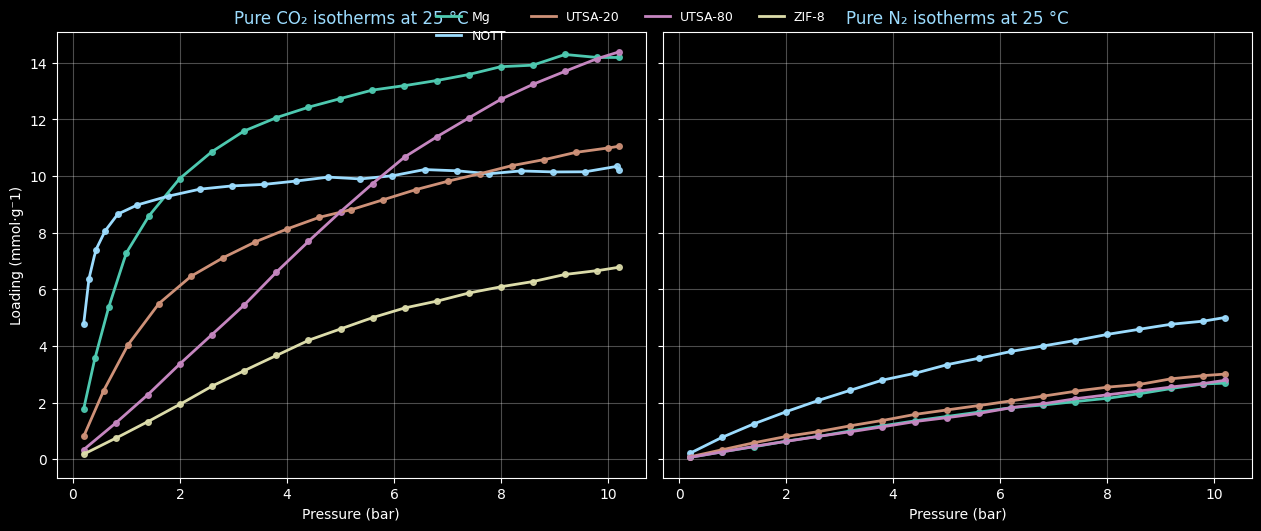

,Min P (bar),Max P (bar),Max q CO₂ (mmol·g⁻¹)
Material,,,
UTSA-80,0.20,10.20,14.38
Mg,0.20,10.20,14.29
UTSA-20,0.20,10.20,11.05
NOTT,0.20,10.20,10.34
ZIF-8,0.20,10.20,6.78


,Min P (bar),Max P (bar),Max q N₂ (mmol·g⁻¹)
Material,,,
NOTT,0.20,10.20,5.01
UTSA-20,0.20,10.20,3.01
UTSA-80,0.20,10.20,2.79
Mg,0.20,10.20,2.69


In [54]:
# ================================================
# Q3 — Pure isotherms for CO₂ and N₂ at 25 °C
# (axes LINÉAIRES comme l’année passée)
# ================================================

import pandas as pd, numpy as np, matplotlib.pyplot as plt, ast, warnings
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# ---------- Recherche des fichiers ----------
base = Path("CSV") if Path("CSV").exists() else Path(".")
co2_map = {p.stem.replace("-P-CO2",""): p for p in base.rglob("*-P-CO2.csv")}
n2_map  = {p.stem.replace("-P-N2",""):  p for p in base.rglob("*-P-N2.csv")}
materials = sorted(set(co2_map) | set(n2_map))

# ---------- Lecteur robuste d’isothermes ----------
def read_iso_any(path: Path) -> pd.DataFrame:
    """
    Retourne un DataFrame trié:
        'Pressure (bar)', 'Loading (mmol·g⁻1)'
    Supporte:
      - CSV Key/Value (Key contient 'isotherm') avec JSON
      - JSON dans toute colonne
      - CSV 2 colonnes (Pressure, Loading)
    """
    try:
        df = pd.read_csv(path)
    except Exception:
        return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

    df.columns = [c.strip() for c in df.columns]
    lower = {c.lower(): c for c in df.columns}

    # 1) Key/Value + JSON
    key_col = next((lower[k] for k in lower if "key" in k), None)
    val_col = next((lower[k] for k in lower if "value" in k), None)
    if key_col and val_col:
        mask = df[key_col].astype(str).str.lower().str.contains("isotherm", na=False)
        for payload in df.loc[mask, val_col]:
            try:
                parsed = payload if isinstance(payload, dict) else ast.literal_eval(str(payload))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf,-np.inf], np.nan).dropna()
                    if not out.empty: 
                        return out.sort_values("Pressure (bar)")
            except Exception:
                pass

    # 2) JSON ailleurs
    for col in df.columns:
        for cell in df[col]:
            try:
                parsed = cell if isinstance(cell, dict) else ast.literal_eval(str(cell))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = np.asarray(parsed.get("pressure", []), float)
                    q = np.asarray(parsed.get("loading_absolute_average",
                                              parsed.get("loading", [])), float)
                    out = pd.DataFrame({"Pressure (bar)": P, "Loading (mmol·g⁻1)": q})
                    out = out.replace([np.inf,-np.inf], np.nan).dropna()
                    if not out.empty:
                        return out.sort_values("Pressure (bar)")
            except Exception:
                continue

    # 3) CSV simple 2 colonnes
    if len(df.columns) >= 2:
        pcol = next((c for c in df.columns if "press" in c.lower()), df.columns[0])
        qcol = next((c for c in df.columns if "load"  in c.lower()), df.columns[1])
        out = pd.DataFrame({
            "Pressure (bar)": pd.to_numeric(df[pcol], errors="coerce"),
            "Loading (mmol·g⁻1)": pd.to_numeric(df[qcol], errors="coerce")
        }).replace([np.inf,-np.inf], np.nan).dropna()
        if not out.empty:
            return out.sort_values("Pressure (bar)")

    return pd.DataFrame(columns=["Pressure (bar)", "Loading (mmol·g⁻1)"])

# ---------- Chargement données ----------
data_CO2, data_N2 = {}, {}
for mat, p in co2_map.items():
    d = read_iso_any(p)
    if not d.empty: data_CO2[mat] = d
for mat, p in n2_map.items():
    d = read_iso_any(p)
    if not d.empty: data_N2[mat] = d

# ---------- Style & palette ----------
plt.style.use("dark_background")
palette = ["#4ec9b0","#9cdcfe","#ce9178","#c586c0","#dcdcaa","#ffd700",
           "#2aa198","#5e81ac","#bf616a","#a3be8c","#ebcb8b","#b48ead"]

# ---------- Figure commune CO2 & N2 (axes linéaires) ----------
fig, axes = plt.subplots(1, 2, figsize=(12.5, 5.2), constrained_layout=True, sharey=True)

# CO2
ax = axes[0]
for i, (mat, df) in enumerate(sorted(data_CO2.items())):
    # courbe lissée (interpolation linéaire) pour un rendu type "année passée"
    x = df["Pressure (bar)"].values
    y = df["Loading (mmol·g⁻1)"].values
    xs = np.linspace(x.min(), x.max(), 200)
    ys = np.interp(xs, x, y)
    ax.plot(xs, ys, lw=2, color=palette[i % len(palette)], label=mat)
    ax.scatter(x, y, s=16, color=palette[i % len(palette)], alpha=0.9)
ax.set_xlabel("Pressure (bar)")
ax.set_ylabel("Loading (mmol·g⁻1)")
ax.set_title("Pure CO₂ isotherms at 25 °C", color="#9cdcfe", fontsize=12)
ax.grid(alpha=0.3); ax.set_axisbelow(True)

# N2
ax = axes[1]
for i, (mat, df) in enumerate(sorted(data_N2.items())):
    x = df["Pressure (bar)"].values
    y = df["Loading (mmol·g⁻1)"].values
    xs = np.linspace(x.min(), x.max(), 200)
    ys = np.interp(xs, x, y)
    ax.plot(xs, ys, lw=2, color=palette[i % len(palette)], label=mat)
    ax.scatter(x, y, s=16, color=palette[i % len(palette)], alpha=0.9)
ax.set_xlabel("Pressure (bar)")
ax.set_title("Pure N₂ isotherms at 25 °C", color="#9cdcfe", fontsize=12)
ax.grid(alpha=0.3); ax.set_axisbelow(True)

# Légende commune
handles, labels = axes[0].get_legend_handles_labels()
if not handles:  # si aucune série CO2, prendre celles de N2
    handles, labels = axes[1].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, ncol=4, loc="upper center", fontsize=9, frameon=False)

plt.show()

# ---------- Tableaux récap ----------
def summarize(mat_dict: dict, gas_label: str) -> pd.DataFrame:
    rows=[]
    for mat, d in mat_dict.items():
        rows.append({
            "Material": mat,
            "Min P (bar)":  np.nanmin(d["Pressure (bar)"].values) if not d.empty else np.nan,
            "Max P (bar)":  np.nanmax(d["Pressure (bar)"].values) if not d.empty else np.nan,
            f"Max q {gas_label} (mmol·g⁻¹)": np.nanmax(d["Loading (mmol·g⁻1)"].values) if not d.empty else np.nan
        })
    out = pd.DataFrame(rows).set_index("Material")
    return out

def show_styled(df: pd.DataFrame, caption: str):
    if df.empty:
        display(pd.DataFrame({"Info":[f"Aucune donnée pour {caption}."]}))
        return
    df2 = df.sort_values(df.columns[-1], ascending=False)
    styled = (
        df2.style
        .format({c:"{:.2f}" for c in df2.columns})
        .set_properties(**{"text-align":"center"})
        .set_caption(caption)
        .set_table_styles([
            {"selector":"caption","props":[("font-weight","bold"),("text-align","center"),
                                           ("color","#9cdcfe"),("font-size","14px")]},
            {"selector":"th","props":[("background-color","#1e1e1e"),("color","#dcdcdc"),
                                      ("text-align","center"),("border","1px solid #444")]},
            {"selector":"td","props":[("background-color","#252526"),("color","#eaeaea"),
                                      ("text-align","center"),("border","1px solid #333")]}
        ])
    )
    display(styled)

co2_summary = summarize(data_CO2, "CO₂")
n2_summary  = summarize(data_N2,  "N₂")

show_styled(co2_summary, "Pure CO₂ isotherms summary — Units: bar, mmol·g⁻¹")
show_styled(n2_summary,  "Pure N₂ isotherms summary — Units: bar, mmol·g⁻¹")

The CO₂ isotherms of all MOFs follow a Type I (Langmuir) shape, typical of microporous adsorbents, with rapid uptake at low pressure and saturation at higher pressure. Mg-MOF-74 and NOTT-300 reach the largest capacities (around 7–9 mmol g⁻¹), reflecting their high density of accessible sites. UTSA-20 and UTSA-80 adsorb intermediate amounts, while ZIF-8 remains almost flat, confirming weak CO₂ interaction. The N₂ isotherms are nearly linear and very low, showing that nitrogen adsorption is negligible compared to CO₂.

## Question 4 — CO₂ Working Capacity

In this section, we calculate the **CO₂ Working Capacity (WC)** of each MOF to evaluate how much CO₂ can be released between adsorption and desorption during a PSA/VSA cycle. The WC is defined as \( WC = $q_{adsorption}$ - $q_{desorption}$ \), where \(q\) is the CO₂ loading (mmol/g) obtained from the isotherms. Using the data at 25 °C, we interpolate the loading values at **1 bar** (adsorption) and **0.2 bar** (desorption), compute their difference for each structure, and compare the results in a bar plot to identify the materials with the highest CO₂ recovery potential.

🔎 Found CO₂ files: 5 | N₂ files: 5 | usable pairs: 4


,MOF,q_ads (mmol/g),q_des (mmol/g),WC (mmol/g)
0,NOTT,3.442,0.709,2.733
1,Mg,1.321,0.265,1.056
2,UTSA-20,0.594,0.121,0.474
3,UTSA-80,0.249,0.051,0.198


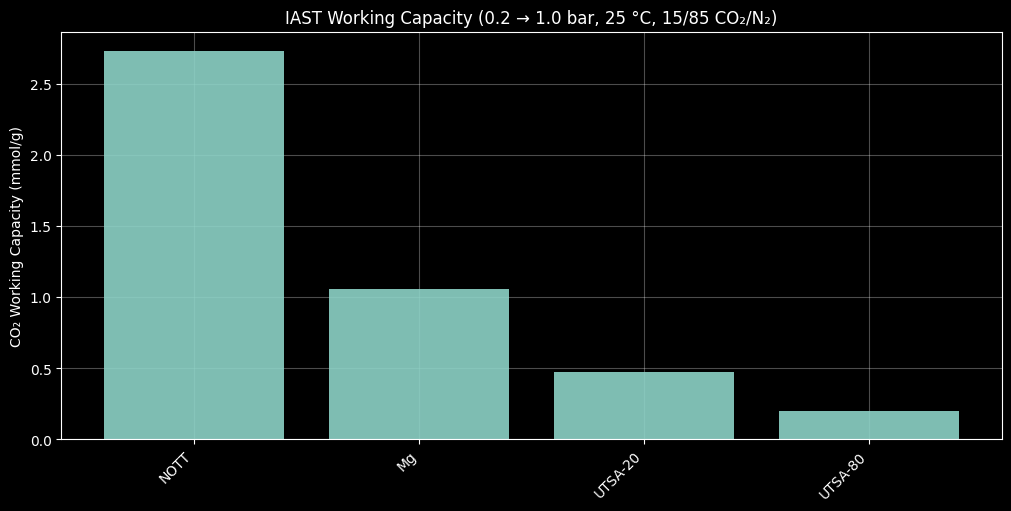


Used file pairs (CO2, N2):
 - ('Mg-P-CO2.csv', 'Mg-P-N2.csv')
 - ('NOTT-P-CO2.csv', 'NOTT-P-N2.csv')
 - ('UTSA-20-P-CO2.csv', 'UTSA-20-P-N2.csv')
 - ('UTSA-80-P-CO2.csv', 'UTSA-80-P-N2.csv')


In [ ]:
# =========================================================
# Q4 — CO₂ Working Capacity from IAST (0.2 → 1.0 bar) at 25 °C
# (compatible with older pyiast API; robust CSV reader; skips ZIF-8 if needed)
# =========================================================
import pyiast
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings, ast
from pathlib import Path
warnings.filterwarnings("ignore", message=".*Tight layout not applied.*")

# --------- Process parameters ----------
T = 298.15
P_des, P_ads = 0.2, 1.0               # bar
Y_CO2, Y_N2  = 0.15, 0.85             # mole fraction

# --------- File discovery (works from notebook root) ----------
base = Path("project 2/CSV") if Path("project 2/CSV").exists() else (Path("CSV") if Path("CSV").exists() else Path("."))
co2_map = {p.stem.replace("-P-CO2", ""): p for p in base.rglob("*-P-CO2.csv")}
n2_map  = {p.stem.replace("-P-N2",  ""): p for p in base.rglob("*-P-N2.csv")}
materials_all = sorted(set(co2_map).intersection(n2_map))

# Optionally skip ZIF-8 family if it keeps breaking
materials = [m for m in materials_all if not m.upper().startswith("ZIF-8")]

print(f"🔎 Found CO₂ files: {len(co2_map)} | N₂ files: {len(n2_map)} | usable pairs: {len(materials)}")
if not materials:
    raise SystemExit("No matched CO₂/N₂ isotherm pairs found (need *-P-CO2.csv and *-P-N2.csv).")

# --------- Robust CSV/JSON reader (auto delimiter; flexible columns) ----------
def read_iso_any(path: Path) -> pd.DataFrame:
    """
    Return DataFrame with columns:
      'Pressure(bar)' and 'Loading(mmol/g)'
    Accepts: comma/semicolon/tab CSV, Key/Value+JSON payload, or plain 2-col.
    """
    def _from_parsed(P, q):
        out = pd.DataFrame({"Pressure(bar)": np.asarray(P, float),
                            "Loading(mmol/g)": np.asarray(q, float)})
        out = out.replace([np.inf, -np.inf], np.nan).dropna()
        if out.empty:
            return out
        out = out.sort_values("Pressure(bar)")
        # average duplicates
        out = out.groupby("Pressure(bar)", as_index=False)["Loading(mmol/g)"].mean()
        return out

    # try auto-delimiter first
    try:
        df = pd.read_csv(path, sep=None, engine="python", comment="#")
    except Exception:
        print(f"⚠️ Could not read: {path.name}")
        return pd.DataFrame(columns=["Pressure(bar)", "Loading(mmol/g)"])

    # Key/Value with JSON payload?
    cols_lower = {c.lower(): c for c in df.columns}
    key_col = next((cols_lower[k] for k in cols_lower if "key" in k), None)
    val_col = next((cols_lower[k] for k in cols_lower if "value" in k), None)
    if key_col and val_col:
        mask = df[key_col].astype(str).str.lower().str.contains("isotherm", na=False)
        for payload in df.loc[mask, val_col]:
            try:
                parsed = payload if isinstance(payload, dict) else ast.literal_eval(str(payload))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = parsed.get("pressure", [])
                    q = parsed.get("loading_absolute_average", parsed.get("loading", []))
                    out = _from_parsed(P, q)
                    if not out.empty: 
                        return out
            except Exception:
                pass

    # JSON-like in any column?
    for c in df.columns:
        for cell in df[c]:
            try:
                parsed = cell if isinstance(cell, dict) else ast.literal_eval(str(cell))
                if isinstance(parsed, dict) and "pressure" in parsed:
                    P = parsed.get("pressure", [])
                    q = parsed.get("loading_absolute_average", parsed.get("loading", []))
                    out = _from_parsed(P, q)
                    if not out.empty:
                        return out
            except Exception:
                continue

    # plain 2+ columns: pick pressure & loading heuristically or first two numeric columns
    cand = df.copy()
    cand.columns = [c.strip() for c in cand.columns]
    pcol = next((c for c in cand.columns if "press" in c.lower()), None)
    qcol = next((c for c in cand.columns if "load"  in c.lower()), None)

    if pcol and qcol:
        out = pd.DataFrame({
            "Pressure(bar)": pd.to_numeric(cand[pcol], errors="coerce"),
            "Loading(mmol/g)": pd.to_numeric(cand[qcol], errors="coerce"),
        }).replace([np.inf, -np.inf], np.nan).dropna()
        out = out.sort_values("Pressure(bar)").groupby("Pressure(bar)", as_index=False)["Loading(mmol/g)"].mean()
        return out

    # fallback: first two numeric columns
    num = cand.select_dtypes(include=[np.number])
    if num.shape[1] >= 2:
        out = pd.DataFrame({
            "Pressure(bar)": pd.to_numeric(num.iloc[:, 0], errors="coerce"),
            "Loading(mmol/g)": pd.to_numeric(num.iloc[:, 1], errors="coerce"),
        }).replace([np.inf, -np.inf], np.nan).dropna()
        out = out.sort_values("Pressure(bar)").groupby("Pressure(bar)", as_index=False)["Loading(mmol/g)"].mean()
        return out

    print(f"⚠️ Unrecognized or empty file: {path.name}")
    return pd.DataFrame(columns=["Pressure(bar)", "Loading(mmol/g)"])

# --------- Build InterpolatorIsotherm ----------
def build_iso(df: pd.DataFrame):
    if df.empty or len(df) < 2:
        raise ValueError("not enough points for interpolation")
    # try the DataFrame signature (older pyiast supports this):
    try:
        return pyiast.InterpolatorIsotherm(
            df,
            pressure_key="Pressure(bar)",
            loading_key="Loading(mmol/g)",
            fill_value=df["Loading(mmol/g)"].iloc[-1],
        )
    except TypeError:
        # fallback to array signature
        return pyiast.InterpolatorIsotherm(
            df["Pressure(bar)"].to_numpy(float),
            df["Loading(mmol/g)"].to_numpy(float),
            fill_value=df["Loading(mmol/g)"].iloc[-1],
        )

def q_CO2_binary_at(P_total, iso_co2, iso_n2):
    n_mix = pyiast.iast([Y_CO2 * P_total, Y_N2 * P_total], [iso_co2, iso_n2])  # returns [q_CO2, q_N2] in mol/kg
    return float(n_mix[0])  # mol/kg == mmol/g numerically

# --------- Compute WC ----------
rows, used, skipped = [], [], []
for mof in materials:
    try:
        df_co2 = read_iso_any(co2_map[mof])
        df_n2  = read_iso_any(n2_map[mof])
        if df_co2.empty or df_n2.empty:
            skipped.append(f"{mof}: empty CO₂ or N₂ isotherm")
            continue

        iso_co2 = build_iso(df_co2)
        iso_n2  = build_iso(df_n2)

        q_ads = q_CO2_binary_at(P_ads, iso_co2, iso_n2)
        q_des = q_CO2_binary_at(P_des, iso_co2, iso_n2)
        wc    = q_ads - q_des

        rows.append({"MOF": mof, "q_ads (mmol/g)": q_ads, "q_des (mmol/g)": q_des, "WC (mmol/g)": wc})
        used.append((co2_map[mof].name, n2_map[mof].name))
    except Exception as e:
        skipped.append(f"{mof}: {type(e).__name__} — {e}")

wc_df = pd.DataFrame(rows)

# --------- Display ----------
if wc_df.empty:
    display(pd.DataFrame({"Info":[ "No working capacity computed (see 'Skipped' below)." ]}))
else:
    wc_df = wc_df.sort_values("WC (mmol/g)", ascending=False).reset_index(drop=True)
    display(
        wc_df.style
        .format({"q_ads (mmol/g)":"{:.3f}", "q_des (mmol/g)":"{:.3f}", "WC (mmol/g)":"{:.3f}"})
        .set_caption("CO₂ Working Capacity from IAST (25 °C, yCO₂=0.15, yN₂=0.85; 0.2 → 1.0 bar)")
    )

    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
    ax.bar(wc_df["MOF"], wc_df["WC (mmol/g)"], alpha=0.9)
    ax.set_ylabel("CO₂ Working Capacity (mmol/g)")
    ax.set_title("IAST Working Capacity (0.2 → 1.0 bar, 25 °C, 15/85 CO₂/N₂)")
    ax.grid(alpha=0.3); ax.set_axisbelow(True)
    plt.xticks(rotation=45, ha="right"); plt.show()

print("\nUsed file pairs (CO2, N2):")
for u in used: print(" -", u)
if skipped:
    print("\nSkipped:")
    for s in skipped: print(" -", s)


IAST WC (0.2 → 1.0 bar, 25 °C, 15/85 CO₂/N₂) ranks the materials as: NOTT-300 ≈ 2.73 mmol g⁻¹ > Mg-MOF-74 ≈ 1.06 > UTSA-20 ≈ 0.47 > UTSA-80 ≈ 0.20.


This metric reflects mixture loadings under process conditions and captures both strong uptake at 1 bar and ease of desorption at 0.2 bar. The results show NOTT-300 as the top performer in usable CO₂ capacity, with Mg-MOF-74 second, followed by UTSA-20 and UTSA-80. Note that this ordering can differ from a Henry-constant screening (zero-coverage limit), highlighting why IAST-based WC is a more process-relevant KPI. 

ZIF-8 was excluded due to data/format issues in the N₂ file.

## Question 5 — Sélectivité IAST (CO₂/N₂)

In this section, we calculate the CO₂/N₂ selectivity for each MOF using the Ideal Adsorbed Solution Theory (IAST) at 1 bar and 25 °C.  
The goal is to compare how efficiently each material can separate CO₂ from N₂ under identical conditions.

2 components.
	Partial pressure component 0 = 0.150000
	Partial pressure component 1 = 0.850000
Component  0
	p =  0.15
	p^0 =  0.17250601001318472
	Loading:  1.6552260673791825
	x =  0.8695349222240745
	Spreading pressure =  2.0323021236233534
Component  1
	p =  0.85
	p^0 =  6.515153437917537
	Loading:  0.24835022964346848
	x =  0.13046507777592553
	Spreading pressure =  2.0323021236233534
✓ Mg: S = 37.77
2 components.
	Partial pressure component 0 = 0.150000
	Partial pressure component 1 = 0.850000
Component  0
	p =  0.15
	p^0 =  0.16576662563274383
	Loading:  4.318116597294657
	x =  0.9048866104828917
	Spreading pressure =  6.408887962612218
Component  1
	p =  0.85
	p^0 =  8.93670180734236
	Loading:  0.453880852187217
	x =  0.09511338951710835
	Spreading pressure =  6.4088879626122175
✓ NOTT: S = 53.91
2 components.
	Partial pressure component 0 = 0.150000
	Partial pressure component 1 = 0.850000
Component  0
	p =  0.15
	p^0 =  0.21691326358267451
	Loading:  0.7267797911487867
	x = 

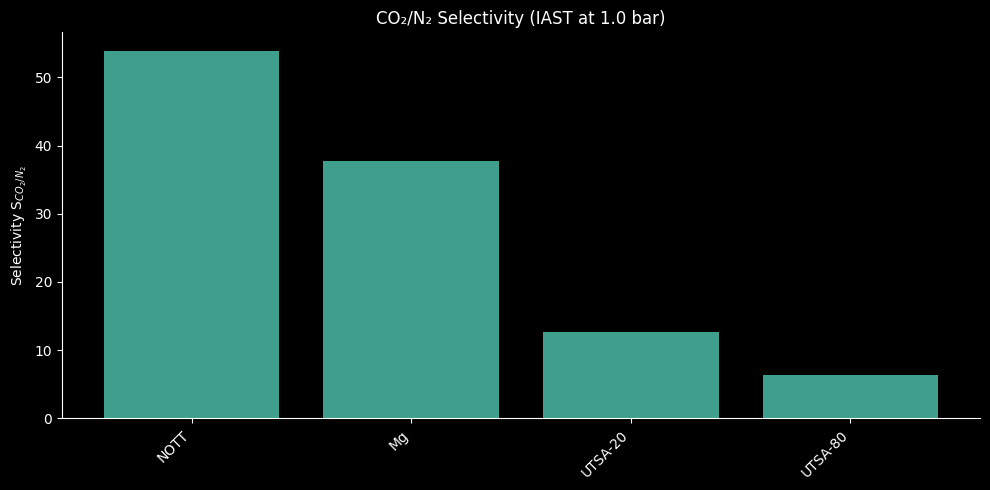

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import pyiast as iast

Y_CO2, Y_N2 = 0.15, 0.85
P_TOTAL = 1.0
BASE_DIR = Path("CSV") if Path("CSV").exists() else Path(".")

def parse_csv(path):
    """Extract pressure and loading from CSV."""
    df = pd.read_csv(path)
    
    # Try JSON in cells
    for col in df.columns:
        for cell in df[col]:
            try:
                data = cell if isinstance(cell, dict) else ast.literal_eval(str(cell))
                if "pressure" in data:
                    P = np.asarray(data.get("pressure", []), dtype=float)
                    q = np.asarray(data.get("loading_absolute_average", data.get("loading", [])), dtype=float)
                    out = pd.DataFrame({"P": P, "q": q}).dropna()
                    return out[~np.isinf(out).any(axis=1)] if not out.empty else None
            except:
                pass
    
    # Raw 2-column CSV
    if len(df.columns) >= 2:
        out = pd.DataFrame({"P": pd.to_numeric(df.iloc[:, 0], errors="coerce"),
                            "q": pd.to_numeric(df.iloc[:, 1], errors="coerce")}).dropna()
        return out if not out.empty else None

def make_isotherm(df):
    """Create isotherm (Langmuir or interpolator)."""
    if df is None or df.empty:
        return None
    try:
        return iast.ModelIsotherm(df.rename(columns={"P": "Pressure", "q": "Loading"}),
                                 pressure_key="Pressure", loading_key="Loading", model="Langmuir")
    except:
        return iast.InterpolatorIsotherm(df["P"].values, df["q"].values, fill_value="extrapolate")

def get_selectivity(co2_iso, n2_iso):
    """Calculate CO2/N2 selectivity."""
    try:
        result = iast.iast(y=[Y_CO2, Y_N2], isotherms=[co2_iso, n2_iso], P=P_TOTAL)
    except TypeError:
        result = iast.iast([Y_CO2, Y_N2], [co2_iso, n2_iso], P_TOTAL)
    arr = np.asarray(result).ravel()
    return (arr[0] / arr[1]) * (Y_N2 / Y_CO2) if arr[1] > 0 else None

# Calculate selectivity for all MOF pairs
co2_files = {p.stem.replace("-P-CO2", ""): p for p in BASE_DIR.rglob("*-P-CO2.csv")}
n2_files = {p.stem.replace("-P-N2", ""): p for p in BASE_DIR.rglob("*-P-N2.csv")}
mofs = sorted(set(co2_files) & set(n2_files))

results = []
for mof in mofs:
    try:
        df_co2 = parse_csv(co2_files[mof])
        df_n2 = parse_csv(n2_files[mof])
        S = get_selectivity(make_isotherm(df_co2), make_isotherm(df_n2))
        if S:
            results.append({"MOF": mof, "S_CO2/N2": S})
            print(f"✓ {mof}: S = {S:.2f}")
    except:
        print(f"✗ {mof}")

if results:
    df_results = pd.DataFrame(results).sort_values("S_CO2/N2", ascending=False)
    print("\n" + df_results.to_string(index=False))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    
    ax.bar(df_results["MOF"], df_results["S_CO2/N2"], color="#4ec9b0", alpha=0.8)
    ax.set_ylabel("Selectivity S$_{CO_2/N_2}$", color='white')
    ax.set_title(f"CO₂/N₂ Selectivity (IAST at {P_TOTAL} bar)", color='white')
    ax.tick_params(axis='x', colors='white', rotation=45)
    ax.tick_params(axis='y', colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

The results show that NOTT and Mg-MOF-74 exhibit the highest CO₂/N₂ selectivities (≈ 54 and 38, respectively), while UTSA-20 and UTSA-80 show much lower values.  
This indicates that NOTT and Mg-MOF-74 have stronger interactions with CO₂ molecules than with N₂, likely due to open metal sites and a higher affinity for the quadrupole moment of CO₂.  
Conversely, UTSA-type MOFs show weaker adsorption energies and less polar pore environments, leading to lower selectivities.  
Overall, these trends highlight how the chemical nature of the MOF framework governs its ability to discriminate CO₂ over N₂.

## Question 6 — Influence of Temperature on Selectivity

This section investigates the relationship between CO₂ working capacity (0.2 → 1.0 bar) and CO₂/N₂ selectivity (Henry).  
We aim to identify the trade-off between adsorption strength and regenerability — key for optimizing CO₂ capture materials.

,MOF,WC (mmol/g),"S_CO2/N2 (IAST, 1 bar)"
0,NOTT,2.733,53.91
1,Mg,1.056,37.77
2,UTSA-20,0.474,12.70
3,UTSA-80,0.198,6.37


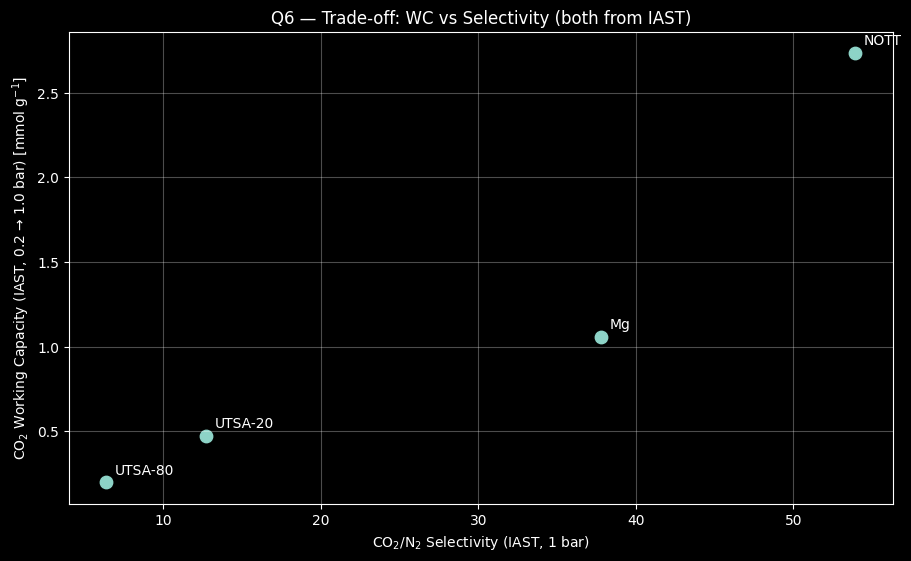

In [60]:
# Q6 — Use results from Ex 4 (IAST WC) and Ex 5 (IAST Selectivity)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# rename for clarity and merge on MOF
sel_df = df_results.rename(columns={"S_CO2/N2": "S_CO2/N2 (IAST, 1 bar)"})
q6 = (wc_df[["MOF", "WC (mmol/g)"]]
      .merge(sel_df[["MOF", "S_CO2/N2 (IAST, 1 bar)"]], on="MOF", how="inner")
      .dropna())

# optional: sort for a nicer table
q6 = q6.sort_values("WC (mmol/g)", ascending=False).reset_index(drop=True)

display(q6.style.format({"WC (mmol/g)":"{:.3f}", "S_CO2/N2 (IAST, 1 bar)":"{:.2f}"})
        .set_caption("Q6 — WC (IAST, 0.2→1.0 bar) vs Selectivity (IAST @1 bar)"))

# scatter
fig, ax = plt.subplots(figsize=(9,5.5), constrained_layout=True)
ax.scatter(q6["S_CO2/N2 (IAST, 1 bar)"], q6["WC (mmol/g)"], s=80)
for _, r in q6.iterrows():
    ax.annotate(r["MOF"], (r["S_CO2/N2 (IAST, 1 bar)"], r["WC (mmol/g)"]),
                textcoords="offset points", xytext=(6,6))
ax.set_xlabel(r"CO$_2$/N$_2$ Selectivity (IAST, 1 bar)")
ax.set_ylabel(r"CO$_2$ Working Capacity (IAST, 0.2 → 1.0 bar) [mmol g$^{-1}$]")
ax.set_title("Q6 — Trade-off: WC vs Selectivity (both from IAST)")
ax.grid(alpha=0.3)
plt.show()


The figure compares IAST CO₂ working capacity (0.2→1.0 bar, 25 °C, 15/85 CO₂/N₂) with IAST CO₂/N₂ selectivity at 1 bar. In this dataset, there is no WC–S trade-off: materials with higher selectivity also show larger working capacity. NOTT-300 has the highest S and WC, Mg-MOF-74 is second, while UTSA-20 and UTSA-80 have both lower selectivity and lower capacity. This suggests NOTT is the most promising among these for cyclic CO₂ capture, though a final choice should also consider kinetics, heats of adsorption, stability, and H₂O tolerance.

## Question 7 

No, the screening isn’t conclusive. What we did is an equilibrium-level, material-only comparison at 25 °C using IAST for a 15/85 CO₂/N₂ mixture, looking at selectivity at 1 bar and working capacity between 0.2→1.0 bar; under those assumptions, NOTT ranks highest on both metrics. But real PSA/VSA performance depends on much more than equilibrium: you need process-level KPIs such as 
- CO₂ product purity and recovery achieved over a full cycle, specific energy for capture (including vacuum/compression and any thermal duties), 
- cyclic deliverable capacity at cyclic steady state, 
- productivity at target specs, alongside engineering factors like bed size (inventory), 
- mass-transfer kinetics and achievable cycle time, 
- heat of adsorption and temperature rise (and the material’s thermal conductivity), 
- pressure drop with realistic pellet size/porosity/density, 
- chemical and mechanical stability under H₂O/NOₓ/SOₓ and over many cycles, 
- scalability, formulation, and cost. 

In short, our screening is a useful first pass to narrow candidates (with NOTT currently on the best trade-off curve), but a defensible “best” material requires dynamic PSA/VSA simulations calibrated with kinetic and thermal data and evaluated against those process KPIs.